In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [323]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [325]:
dataraw = pd.read_excel("/Users/heyminhminh/Downloads/Clean.xls")
data = dataraw.copy()



In [326]:
data['date_of_loss'] = pd.to_datetime(data['date_of_loss'])

# Convert the date format from YMD to DMY
data['date_of_loss'] = data['date_of_loss'].dt.strftime('%d-%m-%Y')

In [327]:
data.head()

,Claim_number,date_of_loss,Notifier,Loss_code,Loss_description,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,...,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred
0,1,15-04-2005,PH,LD003,Head on collision,22,13,Main Road,NORMAL,Y,...,0,1,0,0,0,0,0,0,0,NaN
1,2,20-04-2005,CNF,LD003,Head on collision,1,9,Main Road,WET,Y,...,0,0,0,0,1,0,0,0,0,1925.881426
2,3,24-04-2005,CNF,LD003,Head on collision,5,17,Main Road,WET,Y,...,0,1,0,0,0,0,0,0,0,839.338406
3,4,13-05-2005,CNF,LD003,Head on collision,1,23,Main Road,N/K,Y,...,0,0,0,0,0,0,0,1,0,2426.757682
4,5,11-06-2005,CNF,LD003,Head on collision,1,48,Other,N/K,N,...,0,0,0,0,0,0,0,0,0,2169.721739


In [328]:
data['Incurred'] = data['Incurred'].replace(0, float('nan'))
def missing_values_analysis(data):
    na_columns_ = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (data[na_columns_].isnull().sum() / data.shape[0] * 100).sort_values(ascending=True)
    missing_data = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_data = pd.DataFrame(missing_data)
    return missing_data

def check_dataframe(data, head=5, tail = 5):
    
    print(" SHAPE ".center(82,'~'))
    print('Rows: {}'.format(data.shape[0]))
    print('Columns: {}'.format(data.shape[1]))
    print(" TYPES ".center(82,'~'))
    print(data.dtypes)
    print("".center(82,'~'))
    print(missing_values_analysis(data))
    print(' DUPLICATED VALUES '.center(83,'~'))
    print(data.duplicated().sum())
numerical_data = data.select_dtypes(include=np.number)
quantiles = numerical_data.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T
print(quantiles)

check_dataframe(data)

                                    0.00       0.05         0.50  \
Claim_number                     1.00000  385.45000  3845.500000   
Notification_period              0.00000    0.00000     1.000000   
Inception_to_loss                0.00000   14.00000   161.000000   
Time_hour                        0.00000    2.00000    13.000000   
Vehicle_registration_present     0.00000    1.00000     1.000000   
Incident_details_present         0.00000    0.00000     1.000000   
Injury_details_present           0.00000    0.00000     0.000000   
TP_type_insd_pass_back           0.00000    0.00000     0.000000   
TP_type_insd_pass_front          0.00000    0.00000     0.000000   
TP_type_driver                   0.00000    0.00000     1.000000   
TP_type_pass_back                0.00000    0.00000     0.000000   
TP_type_pass_front               0.00000    0.00000     0.000000   
TP_type_bike                     0.00000    0.00000     0.000000   
TP_type_cyclist                  0.00000    0.00

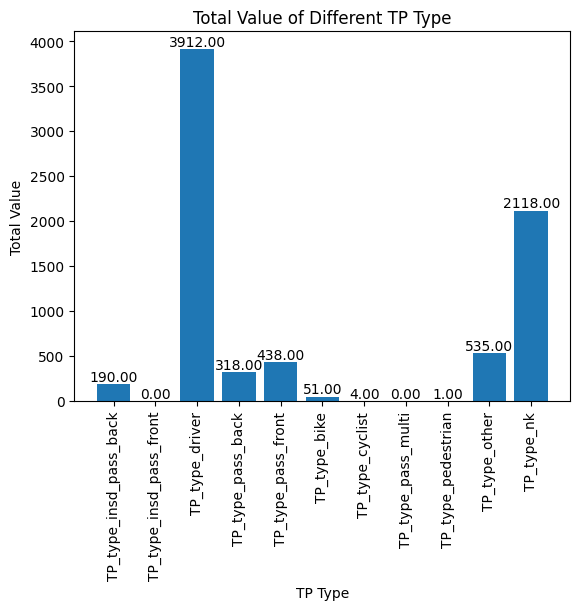

In [332]:
# Define the TP types
tp_types = ['TP_type_insd_pass_back', 'TP_type_insd_pass_front', 'TP_type_driver',
              'TP_type_pass_back', 'TP_type_pass_front', 'TP_type_bike', 'TP_type_cyclist', 'TP_type_pass_multi',
              'TP_type_pedestrian', 'TP_type_other', 'TP_type_nk']
total_value = [data[tp_type].sum() for tp_type in tp_types]

# Set the position of the bars on the x-axis
x_pos = np.arange(len(tp_types))

# Plot the grouped bar chart
bars = plt.bar(x_pos, total_value)

# Customize the chart
plt.xlabel('TP Type')
plt.ylabel('Total Value')
plt.title('Total Value of Different TP Type')
plt.xticks(x_pos, tp_types, rotation=90)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Display the chart
plt.show()

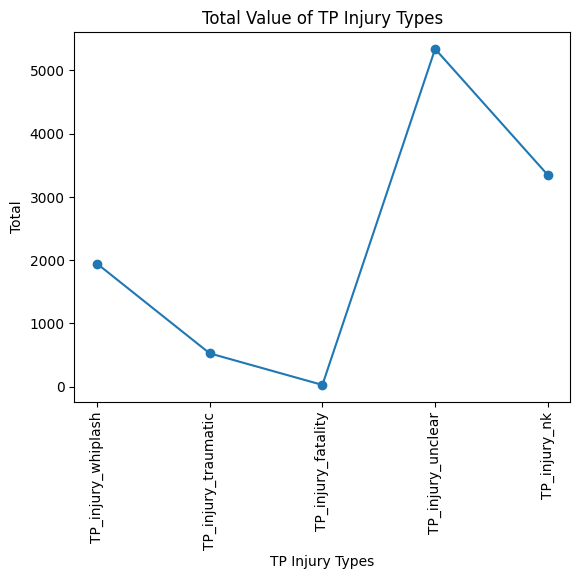

In [333]:
# Define the TP injury types 
tp_injury_types = ['TP_injury_whiplash', 'TP_injury_traumatic', 'TP_injury_fatality',
                   'TP_injury_unclear', 'TP_injury_nk']
Inj_values = [data[tp_injury_type].sum() for tp_injury_type in tp_injury_types]

# Set the position of the bars on the x-axis
x_pos = range(len(tp_injury_types))

# Plot the bar chart

plt.plot(x_pos, Inj_values, marker='o', linestyle='-')


# Customize the chart
plt.xlabel('TP Injury Types')
plt.ylabel('Total')
plt.title('Total Value of TP Injury Types')
plt.xticks(x_pos, tp_injury_types, rotation=90)

# Display the chart
plt.show()

In [334]:
data.dropna(subset=['Incurred'], inplace=True)

/var/folders/dg/tftm8q3j5nb9llkkb71cvxq00000gn/T/ipykernel_77095/4016027738.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Incurred'],kde=True,color='darkred',bins=100).set(title='Data distribution of Incurred')


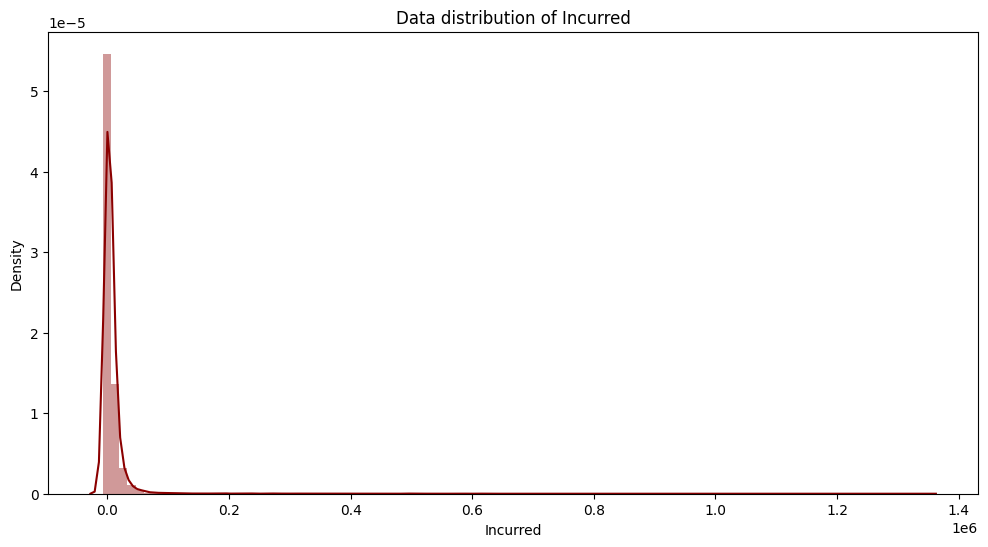

In [335]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(data['Incurred'],kde=True,color='darkred',bins=100).set(title='Data distribution of Incurred')
plt.show()

/Users/heyminhminh/CLUSTER/Cluster/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/dg/tftm8q3j5nb9llkkb71cvxq00000gn/T/ipykernel_77095/3267526401.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Incurred'],kde=True,color='darkred',bins=100).set(title='Data distribution of Incurred')


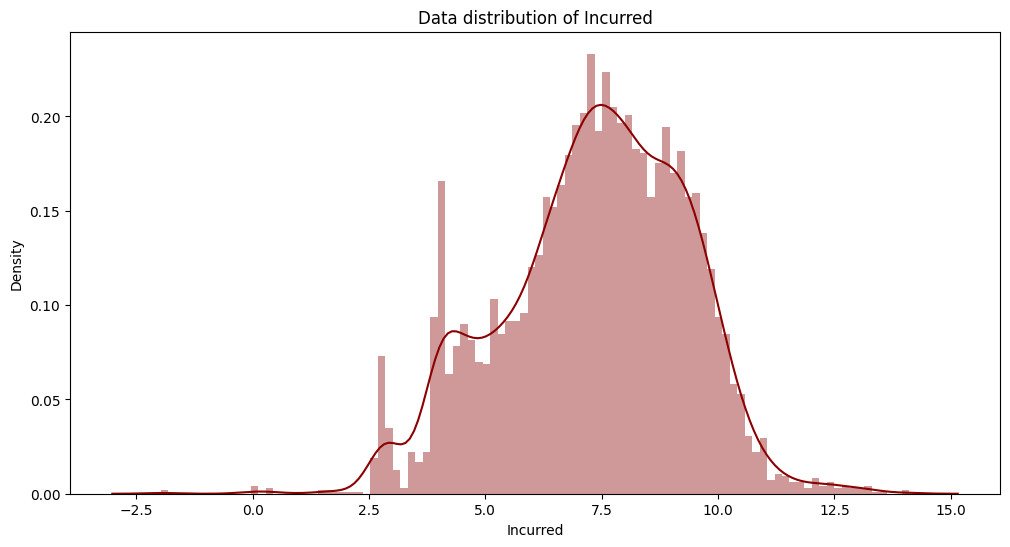

In [336]:
data['Incurred'] = np.log1p(data['Incurred'])
fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(data['Incurred'],kde=True,color='darkred',bins=100).set(title='Data distribution of Incurred')
plt.show()

In [337]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data.dropna(subset=['Incurred'], inplace=True)
# Assuming you have a DataFrame called 'data' containing your dataset
# Split the data into independent variables (X) and dependent variable (y)
X = data[['Vehicle_registration_present', 'Incident_details_present',
          'Injury_details_present', 'TP_type_insd_pass_back', 'TP_type_insd_pass_front', 'TP_type_driver',
          'TP_type_pass_back', 'TP_type_pass_front', 'TP_type_bike', 'TP_type_cyclist', 'TP_type_pass_multi',
          'TP_type_pedestrian', 'TP_type_other', 'TP_type_nk', 'TP_injury_whiplash', 'TP_injury_traumatic',
          'TP_injury_fatality', 'TP_injury_unclear', 'TP_injury_nk']]


X = pd.get_dummies(X)  # Perform one-hot encoding on categorical variables
y = data['Incurred']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Model Interpretation
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
for feature, coefficient in zip(X.columns, coefficients):
    print(f'{feature}: {coefficient}')
print(f'Intercept: {intercept}')

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Vehicle_registration_present: 1.2891383388968654
Incident_details_present: 0.0015680075515555631
Injury_details_present: -0.13768981180784554
TP_type_insd_pass_back: 0.11949616476772303
TP_type_insd_pass_front: -1.7763568394002505e-15
TP_type_driver: 1.1372462508427303
TP_type_pass_back: 0.1118572251787929
TP_type_pass_front: 0.7245108709506383
TP_type_bike: 2.027786360349414
TP_type_cyclist: -0.22351787448396487
TP_type_pass_multi: 1.4432899320127035e-15
TP_type_pedestrian: 2.1713635773286315
TP_type_other: 1.4066614404975286
TP_type_nk: 0.8538797928527668
TP_injury_whiplash: 0.5108172851062011
TP_injury_traumatic: 0.6805008666697158
TP_injury_fatality: 1.1972957030237477
TP_injury_unclear: -0.6068064184442293
TP_injury_nk: -0.29796076291433105
Intercept: 5.3012316814835705
Mean Squared Error (MSE): 2.654748720182198
Root Mean Squared Error (RMSE): 1.6293399645814246
R-squared (R2): 0.261859082217223


In [338]:
# Assuming you have the coefficients stored in a NumPy array called 'coefficients'
for i, coefficient in enumerate(coefficients):
    if abs(coefficient) > 1:
        print(f'{X_train.columns[i]}: {coefficient}')

Vehicle_registration_present: 1.2891383388968654
TP_type_driver: 1.1372462508427303
TP_type_bike: 2.027786360349414
TP_type_pedestrian: 2.1713635773286315
TP_type_other: 1.4066614404975286
TP_injury_fatality: 1.1972957030237477


In [339]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data.dropna(subset=['Incurred'], inplace=True)

# Split the data into independent variables (X) and dependent variable (y)
X = data[['Vehicle_registration_present', 'Incident_details_present',
          'Injury_details_present', 'TP_type_insd_pass_back', 'TP_type_insd_pass_front', 'TP_type_driver',
          'TP_type_pass_back', 'TP_type_pass_front', 'TP_type_bike', 'TP_type_cyclist', 'TP_type_pass_multi',
          'TP_type_pedestrian', 'TP_type_other', 'TP_type_nk', 'TP_injury_whiplash', 'TP_injury_traumatic',
          'TP_injury_fatality', 'TP_injury_unclear', 'TP_injury_nk']]

X = pd.get_dummies(X)  # Perform one-hot encoding on categorical variables
y = data['Incurred']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Model Interpretation
feature_importances = model.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Vehicle_registration_present: 0.0023891020420609126
Incident_details_present: 0.03460997937446054
Injury_details_present: 0.03531713567309868
TP_type_insd_pass_back: 0.02634645490650273
TP_type_insd_pass_front: 0.0
TP_type_driver: 0.0427672062554742
TP_type_pass_back: 0.018707307908316703
TP_type_pass_front: 0.026212191367493247
TP_type_bike: 0.006007279239199626
TP_type_cyclist: 0.0010746957494799656
TP_type_pass_multi: 0.0
TP_type_pedestrian: 0.0002697865796216733
TP_type_other: 0.06272311949613772
TP_type_nk: 0.025919777554039566
TP_injury_whiplash: 0.45938301547844057
TP_injury_traumatic: 0.13158208465589083
TP_injury_fatality: 0.008049130820472232
TP_injury_unclear: 0.051208707589064865
TP_injury_nk: 0.06743302531024574
Mean Squared Error (MSE): 2.6348158615747046
Root Mean Squared Error (RMSE): 1.6232115886644922
R-squared (R2): 0.2674013237238163


In [340]:
# Print the feature importances greater than 0.08
for feature, importance in zip(X.columns, feature_importances):
    if importance > 0.05:
        print(f'{feature}: {importance}')


TP_type_other: 0.06272311949613772
TP_injury_whiplash: 0.45938301547844057
TP_injury_traumatic: 0.13158208465589083
TP_injury_unclear: 0.051208707589064865
TP_injury_nk: 0.06743302531024574
